In [ ]:
In this project, we implement Logistic Regression to classify whether a user will purchase a product based on their Age and Estimated Salary 
from the Social_Network_Ads dataset. Logistic Regression is ideal here because the target variable (Purchased) is binary (0 = No, 1 = Yes), 
making it a suitable classification problem.

Before understanding Logistic Regression, it is helpful to know about Linear Regression, which is another foundational machine learning algorithm. 
Linear Regression is used to predict continuous numerical values by finding the best-fit straight line between input features and the output. 
It models the relationship between variables using a linear equation.

Logistic Regression is actually related to Linear Regression—both are supervised machine learning algorithms and both try to learn relationships 
from data. However, while Linear Regression predicts continuous values, Logistic Regression applies a sigmoid function to convert the linear 
output into a probability between 0 and 1, making it suitable for classification tasks.

In [56]:
import numpy as np      # Used for numerical operations and working with arrays
import pandas as pd     # Used for data loading, cleaning, and manipulation
import matplotlib.pyplot as plt   # Used for creating visualizations and plots
from sklearn.linear_model import LogisticRegression   # Logistic Regression model for classification
from sklearn.model_selection import train_test_split  # Used to split data into training and testing sets
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score  
# Functions to evaluate the model: confusion matrix, accuracy, precision, and recall

In [58]:
df=pd.read_csv(r"C:\Users\Dell\Downloads\Social_Network_Ads.csv")


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [36]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [62]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [64]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [42]:
# Selecting 'Age' and 'EstimatedSalary' as the feature variables for the model
x=df[["Age","EstimatedSalary"]]

In [44]:
# Selecting 'Purchased' as the target variable (the value we want to predict)
y=df["Purchased"]

In [66]:
# Splitting the dataset into training and testing sets (80% training, 20% testing)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)

# Creating a Logistic Regression model object
model = LogisticRegression()

# Training the model using the training data
model.fit(xtrain, ytrain)

# Predicting the output labels for the test dataset
y_predict = model.predict(xtest)

# Creating the confusion matrix to evaluate the classification results
cm = confusion_matrix(ytest, y_predict)
print(cm)

# Extracting each value from the confusion matrix
print("\nTP :", cm[0][0])   # True Positive
print("FN :", cm[0][1])    # False Negative
print("FP :", cm[1][0])    # False Positive
print("TN :", cm[1][1], "\n")  # True Negative

#Accuracy: The percentage of total predictions (both positive and negative) that the model predicted correctly.
#Precision: Out of all predicted positives, how many were actually correct.
#Recall: Out of all actual positives, how many the model correctly identified.

# Calculating the Accuracy of the model
print("Accuracy will be :", accuracy_score(ytest, y_predict))

# Calculating the Recall score (TP / (TP + FN))
print("Recall :", recall_score(ytest, y_predict))

# Calculating the Precision score (TP / (TP + FP))
print("Precision :", precision_score(ytest, y_predict))

[[50  2]
 [ 7 21]]

TP : 50
FN : 2
FP : 7
TN : 21 

Accuracy will be : 0.8875
Recall : 0.75
Precision : 0.9130434782608695


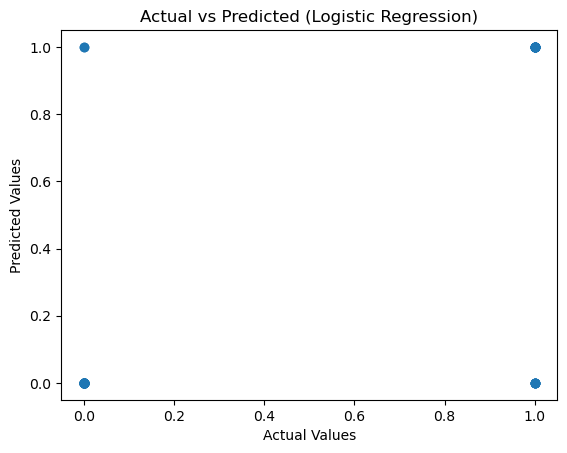

In [68]:
#Scatter Plot – Actual vs Predicted
plt.scatter(ytest, y_predict)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Logistic Regression)")
plt.show()

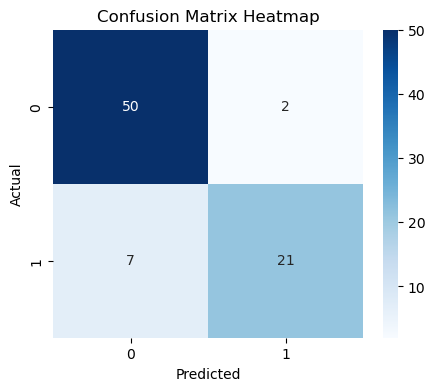

In [70]:
#Confusion Matrix Heatmap
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

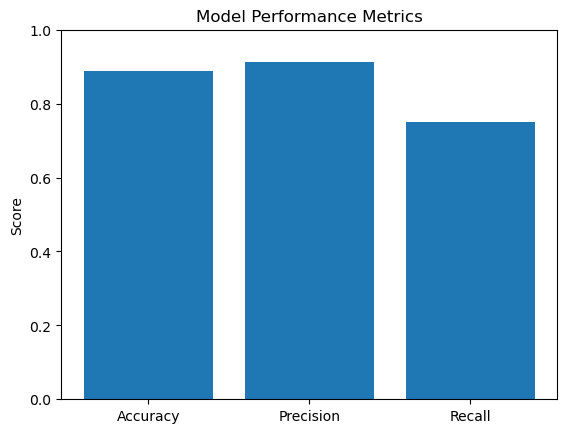

In [74]:
#Bar Chart for Accuracy, Precision, Recall
metrics = ["Accuracy", "Precision", "Recall"]
values = [
    accuracy_score(ytest, y_predict),
    precision_score(ytest, y_predict),
    recall_score(ytest, y_predict)
]
plt.bar(metrics, values)
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()